## Observations and Insights 

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [78]:
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [79]:
combined_df = combined_df.dropna(how='any')

In [80]:
combined_df = combined_df.drop(combined_df.loc[combined_df["Mouse ID"] == "g989"].index)
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [81]:
# Checking the number of mice.
count = combined_df["Mouse ID"].nunique()
count

248

In [82]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df_reduced = combined_df.loc[:,(["Mouse ID", "Timepoint"])]
combined_df_reduced

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [83]:
# Optional: Get all the data for the duplicate mouse ID. 
columns = ["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"]

clean_df = combined_df.loc[combined_df["Mouse ID"] == "g989"]
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [84]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df2 = combined_df.drop_duplicates(["Mouse ID"]== "g989")
clean_df2.head()


KeyError: Index([False], dtype='object')

In [86]:
# Checking the number of mice in the clean DataFrame.
count2 = clean_df["Mouse ID"].nunique()
count2

0

## Summary Statistics

In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summaryData = combined_df[["Drug Regimen", "Tumor Volume (mm3)"]]
groupByData = summaryData.groupby(["Drug Regimen"])

summaryDF = pd.DataFrame({
    "Mean": groupByData["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": groupByData["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Mode": groupByData["Tumor Volume (mm3)"].agg(pd.Series.mode).map('{:.2f}'.format),
    "Variance": groupByData["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Variance": groupByData["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": groupByData["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})

summaryDF.head(10)



,Mean,Median,Mode,Variance,Standard Variance,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60
Placebo,54.03,52.29,45.00,61.17,7.82,0.58
Propriva,52.32,50.45,45.00,43.85,6.62,0.54
Ramicane,40.22,40.67,45.00,23.49,4.85,0.32
Stelasyn,54.23,52.43,45.00,59.45,7.71,0.57


In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_group_stats = combined_df.groupby('Drug Regimen').agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the median of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
        # Get the variance of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
        # Get the standard deviation of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

drug_group_stats

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

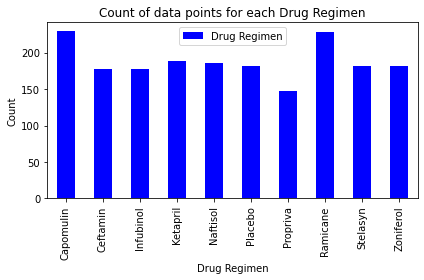

In [102]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# First create a dataframe grouping by the 'Drug Regimen' column
drug_group = combined_df.groupby('Drug Regimen')

# Create a dataframe counting the number of data points for each Drug Regimen
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())


# Create a bar chart based off of the group series from before and label the title
count_chart = drug_group_count.plot(kind='bar', title="Count of data points for each Drug Regimen", color="blue")

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")
plt.tight_layout()

plt.show()

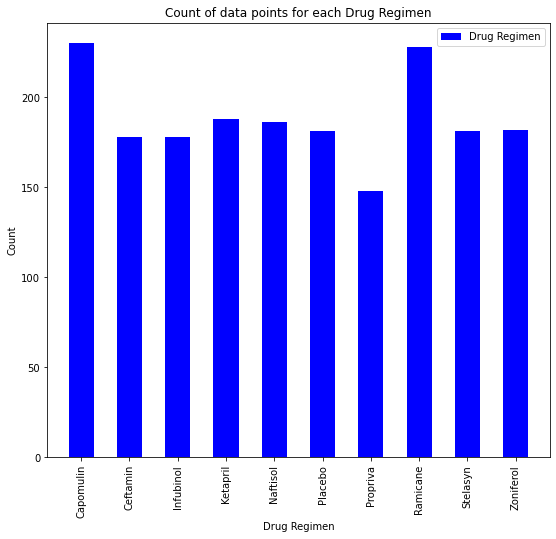

In [103]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Using the same groupby dataframe as above
# Set x axis and tick locations
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(9,8))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='blue', align="center", width = 0.52)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.05)

# Set a Title and labels
plt.title("Count of data points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")


In [111]:
# First create a dataframe grouping by the 'Sex' column
gender_group = combined_df.groupby("Sex")

# Create a dataframe counting the number of data points for each gender
gender_group_count = pd.DataFrame(gender_group["Sex"].count())

# View the groupby dataframe
gender_group_count.head()

,Sex
Sex,
Female,922
Male,958


FileNotFoundError: [Errno 2] No such file or directory: 'figures/PandaPieChart.png'

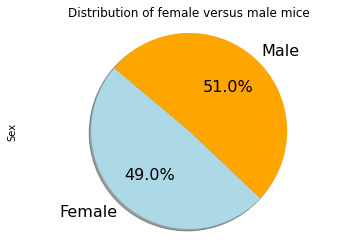

In [112]:
# Create a pie chart based off of the group series from before
gender_group_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female versus male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["lightblue","orange"],legend =False)
# Make the axis equal to avoid plotting an egg shaped pie chart
plt.axis("equal")
plt.savefig("figures/PandaPieChart.png")
plt.show()

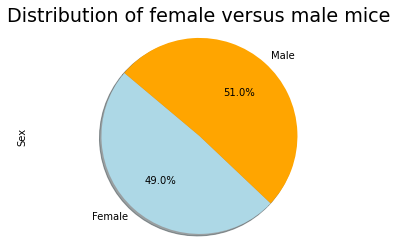

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get Labels for our pie chart from the index values of the groupby dataframe
genders = list(gender_group_count.index.values)

# The values of each section of the pie chart
gender_counts = gender_group_count['Sex']

# The colors of each section of the pie chart
colors = ["lightblue", "orange"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
